In [27]:
import numpy as np
from pandas import read_csv
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [9]:
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

In [10]:
def load_const_dataset_group(group, prefix=''):
    X = load_file(prefix+group+'/X_'+group+'.txt')
    y = load_file(prefix + group + '/y_' + group + '.txt')
    return X, y

In [13]:
prefix = '/home/dani/Documents/dlPrac2/'
aux_trainX, _ = load_const_dataset_group('train', prefix + 'HARDataset/')

In [14]:
aux_testX, _ = load_const_dataset_group('test', prefix + 'HARDataset/')

In [31]:
aux_trainX.shape

(7352, 561)

In [32]:
aux_testX.shape

(2947, 561)

In [23]:
data = np.concatenate((aux_trainX, aux_testX), axis=0)

In [24]:
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data)

In [25]:
pca = PCA().fit(data_rescaled)

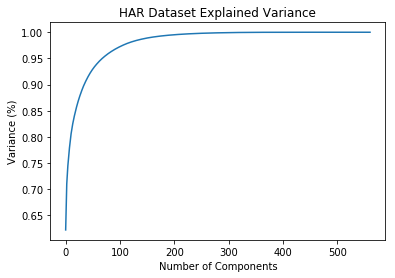

In [28]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('HAR Dataset Explained Variance')
plt.show()

In [29]:
pca = PCA(n_components=175)
dataset = pca.fit_transform(data_rescaled)

In [30]:
dataset.shape

(10299, 175)

In [33]:
trainX = dataset[0:aux_trainX.shape[0]][:]

In [34]:
trainX.shape

(7352, 175)

In [37]:
testX = dataset[aux_trainX.shape[0]:][:]

In [38]:
testX.shape

(2947, 175)